# Description

TODO

- rename this file to be 27-

# Modules

In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
from statsmodels.graphics.gofplots import qqplot_2samples
import matplotlib.pyplot as plt
import seaborn as sns

import conf

# Settings

In [2]:
INPUT_DIR = conf.RESULTS["GLS"]
display(INPUT_DIR)

PosixPath('/opt/data/results/gls')

In [3]:
INPUT_FILENAME = INPUT_DIR / "gls-null_simulations.pkl"
display(INPUT_FILENAME)
assert INPUT_FILENAME.exists()

PosixPath('/opt/data/results/gls/gls-null_simulations.pkl')

In [4]:
INPUT_REAL_FILENAME = INPUT_DIR / "gls-null_simulations-real_data.pkl"
display(INPUT_REAL_FILENAME)
assert INPUT_REAL_FILENAME.exists()

PosixPath('/opt/data/results/gls/gls-null_simulations-real_data.pkl')

# Null simulations - artificial gene-trait associations

## Load data

In [5]:
results = pd.read_pickle(INPUT_FILENAME)

In [6]:
results.shape

(930, 4)

In [7]:
results.head()

,phenotype,lv,coef,pvalue
0,random_normal-19,LV629,-0.017303,0.916134
1,random_normal-43,LV828,0.010451,0.200734
2,random_normal-29,LV922,0.018611,0.066561
3,random_normal-5,LV444,0.025777,0.018998
4,random_normal-70,LV210,-0.001532,0.550300


## Proportion pvalue < 0.05

In [8]:
_pvalue_lt_005 = results[results["pvalue"] < 0.05]
display(_pvalue_lt_005.head())

,phenotype,lv,coef,pvalue
3,random_normal-5,LV444,0.025777,0.018998
9,random_normal-88,LV370,0.025709,0.019875
20,random_normal-52,LV976,0.024592,0.024082
32,random_normal-35,LV18,0.024381,0.023893
57,random_normal-48,LV891,0.022535,0.031875


In [9]:
_pvalue_lt_005.shape

(54, 4)

In [10]:
# show proportion
_pvalue_lt_005.shape[0] / results.shape[0]

0.05806451612903226

## Plot

In [11]:
data = results["pvalue"].to_numpy()
uniform_data = np.linspace(data.min(), data.max(), num=data.shape[0])

In [12]:
display(data[:5])
display(uniform_data[:5])

array([0.91613363, 0.20073411, 0.06656115, 0.01899791, 0.55030007])

array([4.16868103e-10, 1.07635597e-03, 2.15271151e-03, 3.22906706e-03,
       4.30542261e-03])

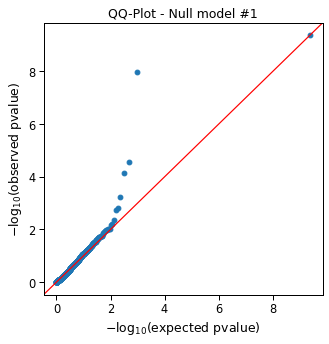

In [13]:
with sns.plotting_context("paper", font_scale=1.3):
    fig, ax = plt.subplots(figsize=(5, 5))

    fig = qqplot_2samples(-np.log10(uniform_data), -np.log10(data), line="45", ax=ax)

    ax.set_xlabel("$-\log_{10}$(expected pvalue)")
    ax.set_ylabel("$-\log_{10}$(observed pvalue)")
    ax.set_title("QQ-Plot - Null model #1")

# Null simulations - real gene-trait associations

## Load data

In [14]:
results = pd.read_pickle(INPUT_REAL_FILENAME)

In [15]:
results.shape

(930, 4)

In [16]:
results.head()

,phenotype,lv,coef,pvalue
0,supraventricular tachycardia,LV836,0.024826,0.023398
1,soft tissue neoplasm,LV965,-0.008985,0.768745
2,22601_62133370-Job_coding_traveltour_guide,LV725,0.000105,0.496584
3,radius fracture,LV670,-0.014912,0.880191
4,radius fracture,LV922,0.024495,0.023172


## Proportion pvalue < 0.05

In [17]:
_pvalue_lt_005 = results[results["pvalue"] < 0.05]
display(_pvalue_lt_005.head())

,phenotype,lv,coef,pvalue
0,supraventricular tachycardia,LV836,0.024826,0.023398
4,radius fracture,LV922,0.024495,0.023172
25,20486-Contemplated_selfharm_in_past_year,LV370,0.028611,0.010701
50,K11_OESOBST-Oesophageal_obstruction,LV350,0.027669,0.012736
51,vascular disease,LV596,0.022975,0.034357


In [18]:
_pvalue_lt_005.shape

(71, 4)

In [19]:
# show proportion
_pvalue_lt_005.shape[0] / results.shape[0]

0.07634408602150537

## Plot

In [20]:
data = results["pvalue"].to_numpy()
uniform_data = np.linspace(data.min(), data.max(), num=data.shape[0])

In [21]:
display(data[:5])
display(uniform_data[:5])

array([0.02339773, 0.76874472, 0.49658352, 0.88019134, 0.02317226])

array([6.16685020e-07, 1.07586585e-03, 2.15111501e-03, 3.22636418e-03,
       4.30161334e-03])

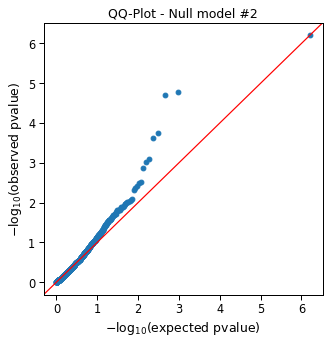

In [22]:
with sns.plotting_context("paper", font_scale=1.3):
    fig, ax = plt.subplots(figsize=(5, 5))

    fig = qqplot_2samples(-np.log10(uniform_data), -np.log10(data), line="45", ax=ax)

    ax.set_xlabel("$-\log_{10}$(expected pvalue)")
    ax.set_ylabel("$-\log_{10}$(observed pvalue)")
    ax.set_title("QQ-Plot - Null model #2")